# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('data.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [129]:
df.shape #so 165k rows

(165085, 4)

In [130]:
tmax = df[df['Element'] == 'TMAX']
tmin = df[df['Element'] == 'TMIN']

In [131]:
%matplotlib notebook

<IPython.core.display.Javascript object>


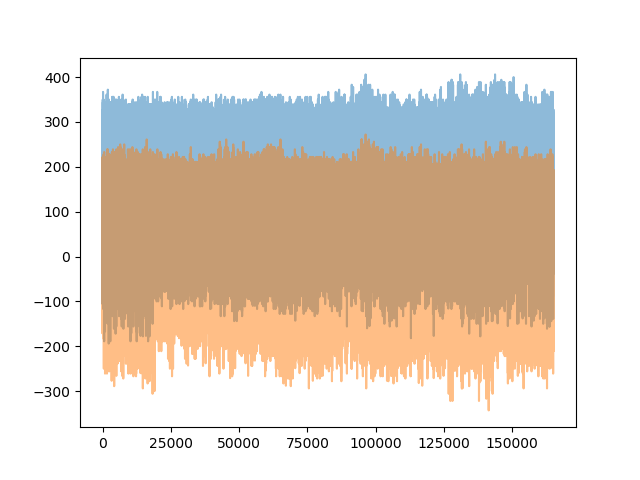

In [132]:
plt.figure()
plt.plot(tmax['Data_Value'], alpha=0.5)
plt.plot(tmin['Data_Value'], alpha=0.5)

In [12]:
df.dtypes

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object

In [133]:
# data value should be in date time format
df['Date'] = pd.to_datetime(df['Date'])

In [134]:
df.dtypes

ID                    object
Date          datetime64[ns]
Element               object
Data_Value             int64
dtype: object

In [135]:
# select one tmax or tmin value for each date
tmax = df[df['Element'] == 'TMAX']
tmin = df[df['Element'] == 'TMIN']

In [136]:
tmax['Date'].tolist()

[Timestamp('2014-11-12 00:00:00'),
 Timestamp('2008-05-26 00:00:00'),
 Timestamp('2005-11-11 00:00:00'),
 Timestamp('2014-02-27 00:00:00'),
 Timestamp('2010-10-01 00:00:00'),
 Timestamp('2005-10-04 00:00:00'),
 Timestamp('2011-04-21 00:00:00'),
 Timestamp('2013-01-16 00:00:00'),
 Timestamp('2006-05-14 00:00:00'),
 Timestamp('2006-05-14 00:00:00'),
 Timestamp('2014-12-07 00:00:00'),
 Timestamp('2008-09-07 00:00:00'),
 Timestamp('2008-02-22 00:00:00'),
 Timestamp('2008-02-10 00:00:00'),
 Timestamp('2008-02-23 00:00:00'),
 Timestamp('2006-05-11 00:00:00'),
 Timestamp('2012-03-31 00:00:00'),
 Timestamp('2010-07-25 00:00:00'),
 Timestamp('2015-03-17 00:00:00'),
 Timestamp('2013-08-23 00:00:00'),
 Timestamp('2008-05-26 00:00:00'),
 Timestamp('2010-01-19 00:00:00'),
 Timestamp('2007-12-14 00:00:00'),
 Timestamp('2015-01-03 00:00:00'),
 Timestamp('2014-11-12 00:00:00'),
 Timestamp('2014-03-09 00:00:00'),
 Timestamp('2015-08-30 00:00:00'),
 Timestamp('2011-06-05 00:00:00'),
 Timestamp('2014-05-

In [137]:
# Split by date and apply max value of Data_Value
tmax_group = tmax.groupby('Date')['Data_Value'].max()

In [138]:
tmax_group = pd.DataFrame(tmax_group)

In [139]:
tmax_group.head()

,Data_Value
Date,
2005-01-01,156
2005-01-02,139
2005-01-03,133
2005-01-04,39
2005-01-05,33


In [140]:
tmax_group.index

DatetimeIndex(['2005-01-01', '2005-01-02', '2005-01-03', '2005-01-04',
               '2005-01-05', '2005-01-06', '2005-01-07', '2005-01-08',
               '2005-01-09', '2005-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=4017, freq=None)

<IPython.core.display.Javascript object>


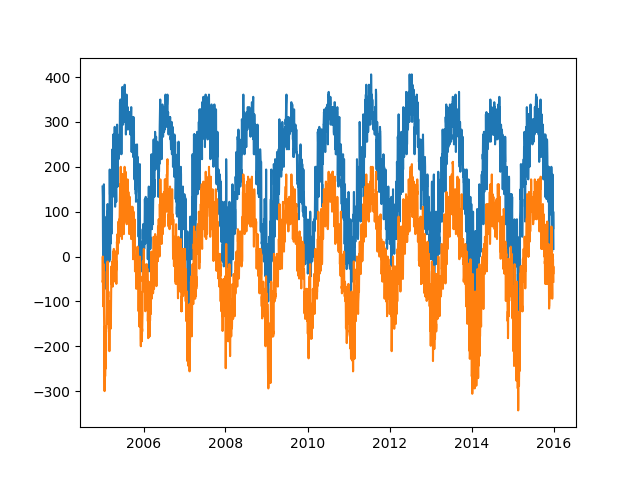

In [141]:
plt.figure()

plt.plot(tmax_group.index, tmax_group['Data_Value'])

#plt.gca().axis([2005,2014,-400,400])

In [15]:
# showing dates on xticks will be tricky

In [142]:
tmin_group = pd.DataFrame(tmin.groupby('Date')['Data_Value'].min())

In [143]:
tmin_group.head()

,Data_Value
Date,
2005-01-01,-56
2005-01-02,-56
2005-01-03,0
2005-01-04,-39
2005-01-05,-94


In [144]:
plt.plot(tmin_group.index, tmin_group['Data_Value'])

**So what I have done for now is take maximum value for all stations for each date like 2005-01-01, but what I need to do is take maximum value for a calendar day like (01-01) for all the years from 2004-2015. To do this I will need to extract day and month from 'Date' column**

In [145]:
df['Date'][0].year

2014

In [146]:
df['Date'][0].month

11

In [147]:
df['Date'][0].day

12

In [148]:
def get_day(x):
    return x.day

In [149]:
def get_month(x):
    return x.month

In [150]:
df['Day'] = df['Date'].apply(get_day)

In [151]:
df.head()

,ID,Date,Element,Data_Value,Day
0,USW00094889,2014-11-12,TMAX,22,12
1,USC00208972,2009-04-29,TMIN,56,29
2,USC00200032,2008-05-26,TMAX,278,26
3,USC00205563,2005-11-11,TMAX,139,11
4,USC00200230,2014-02-27,TMAX,-106,27


In [152]:
df['Month'] = df['Date'].apply(get_month)

In [153]:
df.head()

,ID,Date,Element,Data_Value,Day,Month
0,USW00094889,2014-11-12,TMAX,22,12,11
1,USC00208972,2009-04-29,TMIN,56,29,4
2,USC00200032,2008-05-26,TMAX,278,26,5
3,USC00205563,2005-11-11,TMAX,139,11,11
4,USC00200230,2014-02-27,TMAX,-106,27,2


**drop leap dates**

In [154]:
def get_leapdate(x):
    if x.month == 2 and x.day==29:
        return True
    else:
        return False

In [158]:
df_leapyear = df[df['Date'].apply(get_leapdate)]

In [164]:
# now we have dropped leap dates
df = df[(df['Day'] != 29) & (df['Month'] != 2)]

In [165]:
df['Date'].min()

Timestamp('2005-01-01 00:00:00')

In [166]:
df['Date'].max()

Timestamp('2015-12-31 00:00:00')

**We only need to consider the data uptil 2014.**

In [167]:
df1 = df[df['Date'] < '2015-01-01 00:00:00']

In [168]:
df1['Date'].max()

Timestamp('2014-12-31 00:00:00')

**ok done**

In [169]:
tmax = df1[df1['Element'] == 'TMAX']
tmin = df1[df1['Element'] == 'TMIN']

In [170]:
tmax_group = tmax.groupby(['Month','Day'])['Data_Value'].max()

In [171]:
tmin_group = tmin.groupby(['Month','Day'])['Data_Value'].min()

<IPython.core.display.Javascript object>


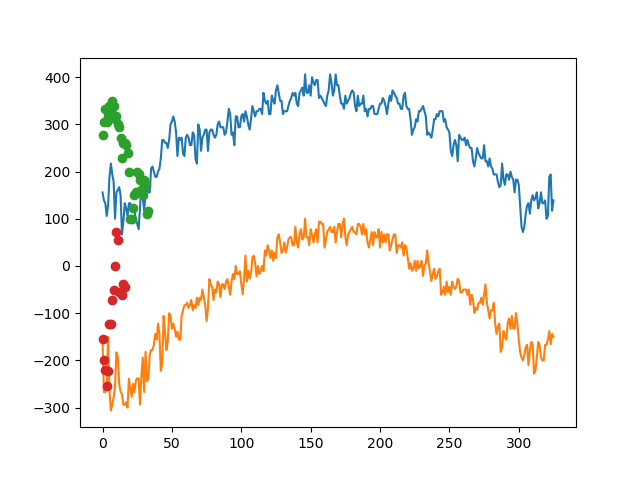

In [172]:
plt.figure()
plt.plot(tmax_group.values)
plt.plot(tmin_group.values)

In [104]:
df1['Date'].max()

Timestamp('2014-12-31 00:00:00')

In [173]:
df['Date'].max()

Timestamp('2015-12-31 00:00:00')

**So now make an overlay scatter plot for the year 2015. If any calender day of 2015 is breaking a record of TMAX and TMIN that data point will be included in our scatter plot**

In [174]:
df2 = df[df['Date'] > '2014-12-31 00:00:00']

In [175]:
df2['Date'].min()

Timestamp('2015-01-01 00:00:00')

In [176]:
df2['Date'].max()

Timestamp('2015-12-31 00:00:00')

In [177]:
df2.head()

,ID,Date,Element,Data_Value,Day,Month
19,USC00205563,2015-01-03,TMIN,-39,3,1
30,USC00203712,2015-03-17,TMAX,189,17,3
34,USC00200032,2015-06-06,TMIN,128,6,6
46,USW00014833,2015-08-30,TMIN,178,30,8
50,USC00202308,2015-08-30,TMIN,156,30,8


In [178]:
tmax1 = df2[df2['Element'] == 'TMAX']

In [179]:
tmin1 = df2[df2['Element'] == 'TMIN']

In [180]:
tmax1_group = tmax1.groupby(['Month','Day'])['Data_Value'].max()

In [181]:
tmin1_group = tmin1.groupby(['Month','Day'])['Data_Value'].min()

In [182]:
tmax_group.head()

Month  Day
1      1      156
       2      139
       3      133
       4      106
       5      128
Name: Data_Value, dtype: int64

In [183]:
tmax1_group.head()

Month  Day
1      1      11
       2      39
       3      39
       4      44
       5      28
Name: Data_Value, dtype: int64

In [189]:
tmax_record = tmax1_group[(tmax1_group.values) > (tmax_group.values)]

In [190]:
tmin_record = tmin1_group[(tmin1_group.values) < (tmin_group.values)]

In [191]:
tmax_record.head()

Month  Day
4      17     278
5      7      306
       8      333
       11     306
       18     317
Name: Data_Value, dtype: int64

In [192]:
plt.plot(tmax_record.values, 'o')
plt.plot(tmin_record.values, 'o')

In [194]:
tmax_record.index[0][0]

4